In [1]:
#Import the libraries
import math
# import pandas_datareader as web
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout # Long Short-Term Memory layer
import keras
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from timeit import default_timer as timer
plt.style.use('fivethirtyeight')
plt.style.use('fivethirtyeight')

sample_start_date = (datetime.now() - timedelta(days=280)).strftime("%Y-%m-01") 
sample_stop_date = datetime.now().strftime("%Y-%m-%d") 
print("{} -> {}".format(sample_start_date, sample_stop_date))
#STOCK='AAPL'
#STOCK="ADBE"
#STOCK='CAKE'
#STOCK='NCLH'

STOCK='NVDA'

# STOCK='LCID'
# STOCK='TLRY'
#STOCK='NKLA'
#STOCK = "AAPL"
n_days_to_trend=45

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(np.sqrt(-results['mean_test_score'][candidate]),
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)
        
def get_stock_data(stock, sample_start_date, sample_stop_date):
    # web reader no longer works 
    # df = web.DataReader(STOCK, data_source='yahoo', start=sample_start_date, end=sample_stop_date) 

    df = yf.download(stock, start=sample_start_date, end=sample_stop_date)
    return df



/Users/nikolassimpfendorfer/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


2023-10-01 -> 2024-07-22


In [2]:
# Python code demonstrate to create
# Pandas DataFrame by passing lists of
# Dictionaries and row indices.
import pandas as pd

# Initialize data of lists
data = [{'b': 2, 'c': 3}, {'a': 10, 'b': 20, 'c': 30}]

# Creates pandas DataFrame by passing
# Lists of dictionaries and row index.
df = pd.DataFrame(data)

# Print the data
print(df)


    b   c     a
0   2   3   NaN
1  20  30  10.0


In [3]:
from lumibot.brokers import Alpaca
import pandas as pd
from alpaca_trade_api import REST 
from datetime import datetime, timedelta
from alpaca_trade_api.entity import Bar

In [4]:
API_KEY = "PKZ1B4QS69E8RXEEEPUH"
API_SECRET = "bx9TcOQJGS3XewrpuGUJgb3ffxjyPMYwd3tDKTru"
BASE_URL="https://paper-api.alpaca.markets/v2"
rest = REST(base_url = BASE_URL, key_id = API_KEY, secret_key=API_SECRET)


STOCK = "NVDA"


bars = rest.get_bars(STOCK, "1D", "2023-08-01", "2024-04-20")
bar = bars.__dict__["_raw"]

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(bar)

# Rename columns to more readable names if desired
df.rename(columns={'c': 'close', 'h': 'high', 'l': 'low', 'n': 'number_of_trades', 'o': 'open', 't': 'timestamp', 'v': 'volume', 'vw': 'volume_weighted_average_price'}, inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.rename(columns={'t': 'timestamp'}, inplace=True)
df.set_index('timestamp', inplace=True)
# Display the DataFrame to see the result
print(df)


                             close      high       low  number_of_trades  \
timestamp                                                                  
2023-08-01 04:00:00+00:00  465.070  469.0000  460.2700            381647   
2023-08-02 04:00:00+00:00  442.690  458.4000  433.8700            807206   
2023-08-03 04:00:00+00:00  445.150  451.1800  438.0000            461019   
2023-08-04 04:00:00+00:00  446.800  456.4200  443.9300            504076   
2023-08-07 04:00:00+00:00  454.165  455.4000  445.6345            441457   
...                            ...       ...       ...               ...   
2024-04-15 04:00:00+00:00  860.010  906.1300  859.2901            924636   
2024-04-16 04:00:00+00:00  874.150  881.1800  860.6390            718364   
2024-04-17 04:00:00+00:00  840.350  887.7500  839.5000            973568   
2024-04-18 04:00:00+00:00  846.710  861.8999  824.0200            837609   
2024-04-19 04:00:00+00:00  762.000  843.2400  756.0600           1766352   

           

In [5]:
sample_start_date = (datetime.now() - timedelta(days=280)).strftime("%Y-%m-01") 
sample_stop_date = datetime.now().strftime("%Y-%m-%d") 
print("{} -> {}".format(sample_start_date, sample_stop_date))
#STOCK='AAPL'
#STOCK="ADBE"
#STOCK='CAKE'
#STOCK='NCLH'

STOCK=''
stock = yf.Ticker(STOCK)
# STOCK='LCID'
# STOCK='TLRY'
#STOCK='NKLA'
#STOCK = "AAPL"
n_days_to_trend=45

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(np.sqrt(-results['mean_test_score'][candidate]),
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


class TimingCallback(keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)
        
def get_stock_data(stock, sample_start_date, sample_stop_date):
    # web reader no longer works 
    # df = web.DataReader(STOCK, data_source='yahoo', start=sample_start_date, end=sample_stop_date) 

    df = yf.download(stock, start=sample_start_date, end=sample_stop_date)
    return df
def get_financial_data(stock, sample_start_date, sample_stop_date):
    pass
#Get the stock quote 
df = get_stock_data(STOCK, sample_start_date=sample_start_date, sample_stop_date=sample_stop_date)

[*********************100%%**********************]  0 of 0 completed

2023-10-01 -> 2024-07-22


ValueError: No objects to concatenate

In [ ]:
#print(stock.quarterly_income_stmt)
earnings = pd.to_datetime(stock.quarterly_balance_sheet.columns)
#print(stock.get_shares_full(start="2022-01-01", end= ))
date = pd.to_datetime(df.index.values)
print(earnings)

for i in reversed(range(len(earnings))):
    if date[0] > earnings[i]:
        print("hello")
    else :
        print(i+1)
        break
df.filter()

DatetimeIndex(['2023-12-31', '2023-09-30', '2023-06-30', '2023-03-31'], dtype='datetime64[ns]', freq=None)
hello
hello
2


In [ ]:
def append_earnings(data, earnings):
    date = pd.to_datetime(data.index.values)
    j = 0
    
    for i in reversed(range(len(earnings))):
        if date[0] > earnings[i]:
            print("hello")
        else :
            j = i+1
            break

    for i in range(len(data)):
        if(date[i] == earnings[]) 
        

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3808650517.py, line 13)

KeyError: 'Close'

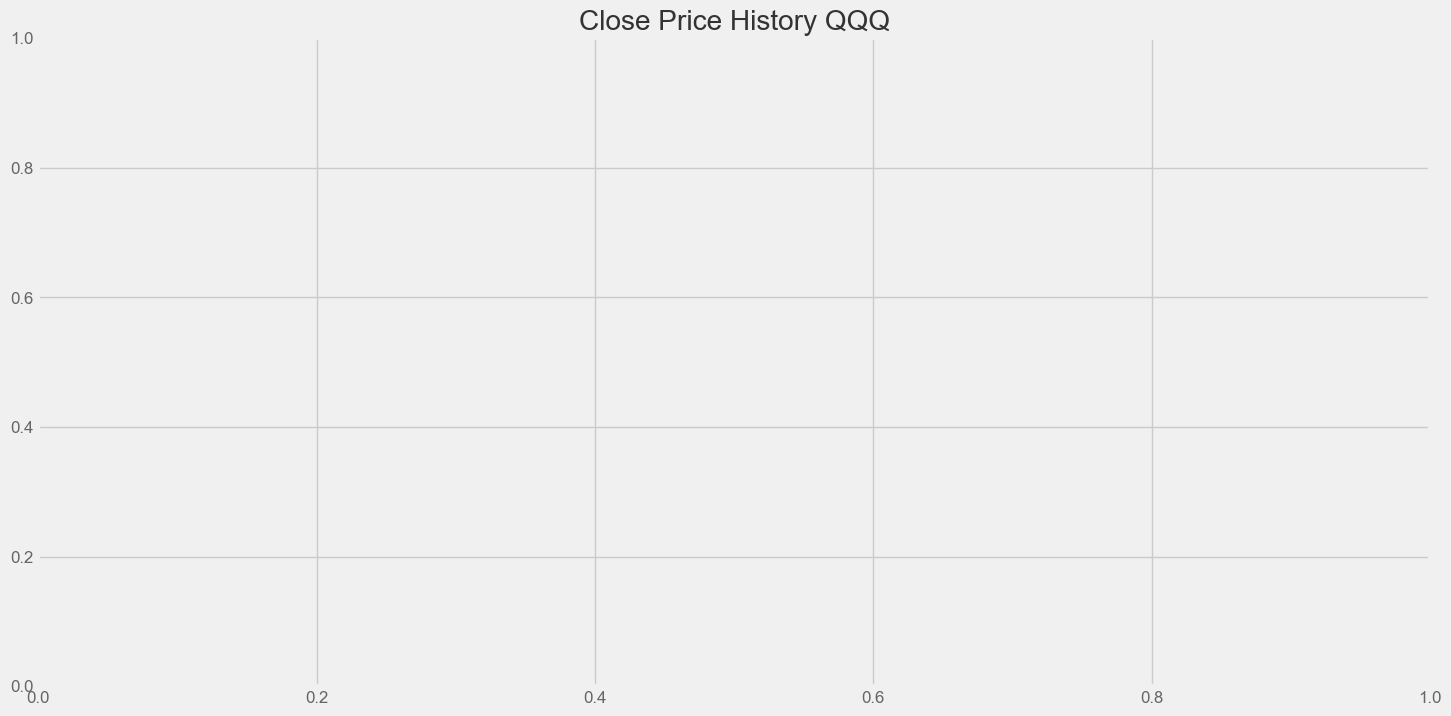

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History {}'.format(STOCK))
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
def y_predictor(data):
    percent = (data[0]-data[1])/data[0]*100
    return percent

In [ ]:
data = df.filter(["close","open","high","low","volume"])
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 ) 

#price scaler
close = np.array([[C] for C  in dataset[0:, 0]])
scalerP = MinMaxScaler(feature_range=(0, 1))
scaled_price_close = scalerP.fit_transform(close)

prices = np.array([[O,H,L,V] for O,H,L,V  in dataset[0:, 1:5]])
scalerPs = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scalerPs.fit_transform(prices)


# volume = np.array([[ele] for ele in dataset[0:, 4]])
# scalerV = MinMaxScaler(feature_range = (0,1))
# scaled_vol = scalerV.fit_transform(volume)
#print(train_data)

# combining the training data
train_data = np.append(scaled_price_close,scaled_prices,axis=1)

x_train=[]
y_train = []
for i in range(45,training_data_len):
    x_train.append(train_data[i-45: i, 0:])
    y_train.append([train_data[i,0]])

#print(x_train[0][0])
# bascially x_train and y_train same data (the adjusted stock price) x train is the 45 days before y train 
# so y_train[0] is the 46th day while x_train[0] is the first 45 days. the first 45 days are used to predict the og stock price. 

# y_train = np.array(y_train)
# scalerPer = MinMaxScaler(feature_range=(0,1))
# y_train = scalerPer.fit_transform(y_train)

print(x_train)
print(y_train)

[array([[0.20329624, 0.15695944, 0.16236757, 0.17414535, 0.50910061],
       [0.13320873, 0.20142845, 0.17242438, 0.12393032, 1.        ],
       [0.16549146, 0.11181022, 0.13757101, 0.13757004, 0.46530803],
       [0.18817433, 0.15883003, 0.16743436, 0.18109552, 0.41551295],
       [0.19658483, 0.17481507, 0.16920006, 0.19438773, 0.3034524 ],
       [0.1661711 , 0.16274126, 0.14140949, 0.15894184, 0.22756665],
       [0.14272364, 0.14531077, 0.12367573, 0.13609313, 0.241289  ],
       [0.14068473, 0.13179151, 0.12935667, 0.14208766, 0.24801102],
       [0.11808682, 0.11095995, 0.09235375, 0.11611138, 0.23742899],
       [0.15555178, 0.09310433, 0.11477046, 0.10690239, 0.24902922],
       [0.15019964, 0.13765836, 0.12390603, 0.14816906, 0.22552349],
       [0.11485855, 0.12147181, 0.10286197, 0.12045524, 0.22878782],
       [0.09149605, 0.10050166, 0.08298787, 0.0954346 , 0.26130453],
       [0.10007646, 0.05611768, 0.06932289, 0.07441032, 0.26494219],
       [0.12360887, 0.08842785, 0

In [ ]:
train_data[i ,0]


101

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(101, 45, 5)

In [ ]:
# we wil be using a Sequential model, with 4 players

model = Sequential()
model.add(LSTM(units=113, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=50))
model.add(Dense(units=25))
model.add(Dense(units=1))


#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display a model summary
model.summary()

# model.save('my_stock_model.h5')
model.save('my_model1.keras')

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_44 (LSTM)              (None, 45, 113)           53788     
                                                                 
 lstm_45 (LSTM)              (None, 100)               85600     
                                                                 
 dense_59 (Dense)            (None, 50)                5050      
                                                                 
 dense_60 (Dense)            (None, 25)                1275      
                                                                 
 dense_61 (Dense)            (None, 1)                 26        
                                                                 
Total params: 145,739
Trainable params: 145,739
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Train the model
cb = TimingCallback()
model.fit(x_train, y_train, batch_size=1, epochs=25, workers=1, callbacks=[cb])
# print(cb.logs)
print("{} Seconds".format(sum(cb.logs)))

Epoch 1/25
101/101 [==============================] - 1s 6ms/step - loss: 0.0146
Epoch 2/25
101/101 [==============================] - 1s 7ms/step - loss: 0.0036
Epoch 3/25
101/101 [==============================] - 1s 7ms/step - loss: 0.0041
Epoch 4/25
101/101 [==============================] - 1s 7ms/step - loss: 0.0032
Epoch 5/25
101/101 [==============================] - 1s 7ms/step - loss: 0.0034
Epoch 6/25
101/101 [==============================] - 1s 7ms/step - loss: 0.0027
Epoch 7/25
101/101 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 8/25
101/101 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 9/25
101/101 [==============================] - 1s 7ms/step - loss: 0.0026
Epoch 10/25
101/101 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 11/25
101/101 [==============================] - 1s 7ms/step - loss: 0.0024
Epoch 12/25
101/101 [==============================] - 1s 7ms/step - loss: 0.0033
Epoch 13/25
101/101 [====

In [ ]:
test_data = train_data[training_data_len - n_days_to_trend: , : ]
# print(train_data[training_data_len - n_days_to_trend])
# print(test_data[0])

#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len:, 0]
for i in range(n_days_to_trend,len(test_data)):
    x_test.append(test_data[i-n_days_to_trend:i, : ])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)


In [ ]:
#Reshape the data into the shape accepted by the LSTM
print(x_train[0])
print(y_test[0])

[[0.20329624 0.15695944 0.16236757 0.17414535 0.50910061]
 [0.13320873 0.20142845 0.17242438 0.12393032 1.        ]
 [0.16549146 0.11181022 0.13757101 0.13757004 0.46530803]
 [0.18817433 0.15883003 0.16743436 0.18109552 0.41551295]
 [0.19658483 0.17481507 0.16920006 0.19438773 0.3034524 ]
 [0.1661711  0.16274126 0.14140949 0.15894184 0.22756665]
 [0.14272364 0.14531077 0.12367573 0.13609313 0.241289  ]
 [0.14068473 0.13179151 0.12935667 0.14208766 0.24801102]
 [0.11808682 0.11095995 0.09235375 0.11611138 0.23742899]
 [0.15555178 0.09310433 0.11477046 0.10690239 0.24902922]
 [0.15019964 0.13765836 0.12390603 0.14816906 0.22552349]
 [0.11485855 0.12147181 0.10286197 0.12045524 0.22878782]
 [0.09149605 0.10050166 0.08298787 0.0954346  0.26130453]
 [0.10007646 0.05611768 0.06932289 0.07441032 0.26494219]
 [0.12360887 0.08842785 0.08828497 0.10907432 0.19636819]
 [0.1018605  0.11563643 0.09734377 0.10195039 0.18349944]
 [0.13388837 0.08375138 0.10010748 0.10325355 0.23134166]
 [0.06906805 0

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test)
predictions = scalerP.inverse_transform(predictions)
#print(predictions)
#np.replace(predictions, x_pred)

2/2 [==============================] - 0s 5ms/step


In [ ]:
rmse=np.sqrt(np.mean(((predictions - y_test)**2)))
valid = data[training_data_len:]
valid.insert(1, "Predictions", predictions, True) 
print(rmse)

314.1380319390424


[[183.72069]
 [185.00244]
 [187.71344]
 [186.18378]
 [184.85112]
 [187.3679 ]
 [190.08527]
 [187.67403]
 [182.7574 ]
 [188.82939]
 [185.60333]
 [186.65686]
 [183.30048]
 [187.85603]
 [185.58823]
 [189.00723]
 [187.63083]
 [188.10109]
 [186.6491 ]
 [186.52502]
 [186.05905]
 [184.86678]
 [186.97105]
 [186.97856]
 [188.84995]
 [188.90485]
 [191.56276]
 [189.62753]
 [189.96887]
 [190.19484]
 [190.93336]
 [188.07707]
 [187.37082]
 [187.47443]
 [186.57242]
 [189.12434]]


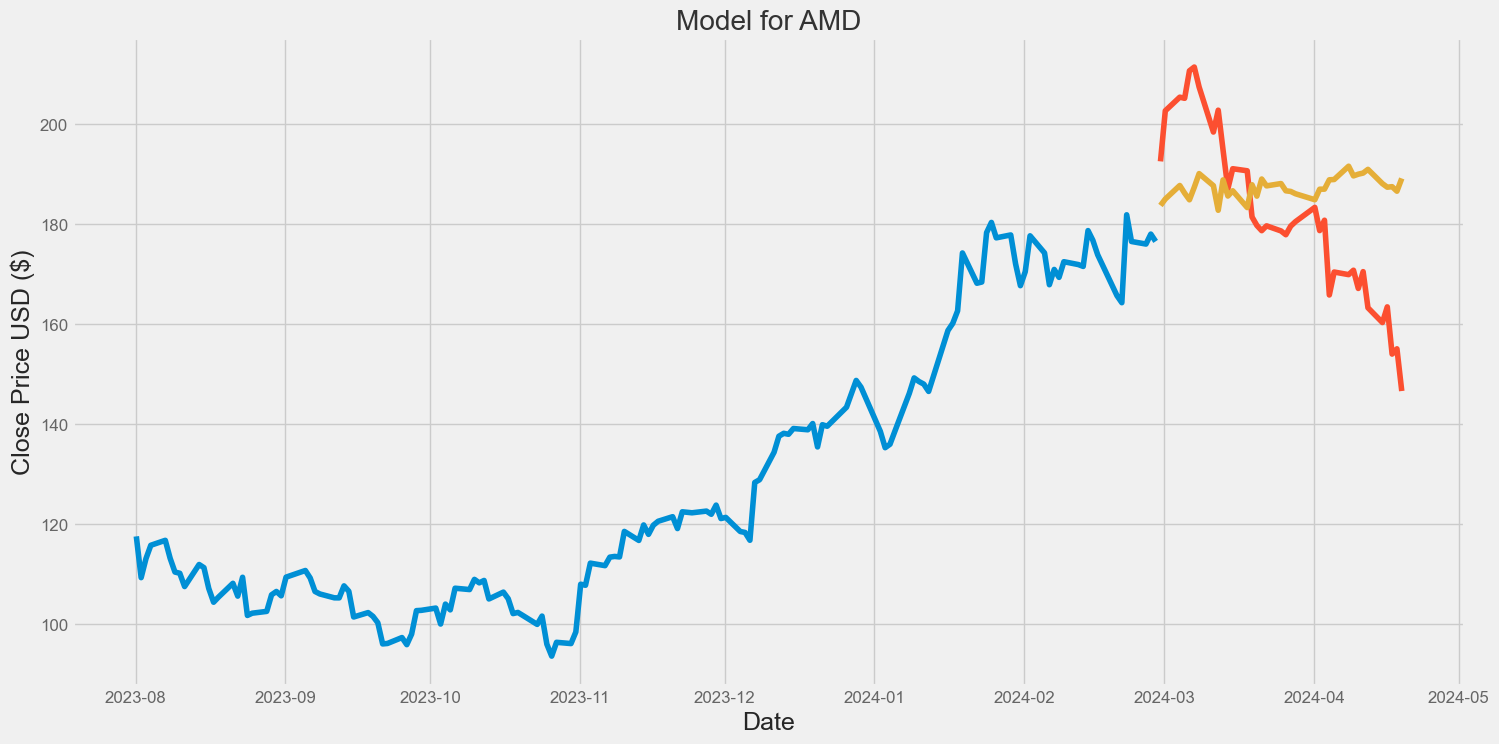

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid.insert(1, "Predictions", predictions, True) 
print(predictions)
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model for {}'.format(STOCK))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
#plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()